In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.__version__

'1.4.0'

In [126]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [123]:
orders = pd.read_csv('orders.csv')

In [124]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [125]:
orders['order_date'].max()

'2017-12-30'



Делаю когортный анализ как в лекции за 2017 год
orders1 - заказы за 2017 год



In [127]:
orders1 = orders[orders['order_date'] > '2016-12-31']
orders1['order_date'] = pd.to_datetime(orders1['order_date'],infer_datetime_format=True)
orders1['InvoiceDate'] = orders1['order_date'].dt.strftime('%Y-%m')

cohorts1 = orders1.groupby('customer_id',as_index=False)['InvoiceDate'].min()
cohorts1.rename(columns = {'InvoiceDate':'Cohort'},inplace=True)
orders1_merged= pd.merge(orders1,cohorts1, how='left', on='customer_id')

<ipython-input-127-52c1aa8bfbd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['order_date'] = pd.to_datetime(orders1['order_date'],infer_datetime_format=True)
<ipython-input-127-52c1aa8bfbd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['InvoiceDate'] = orders1['order_date'].dt.strftime('%Y-%m')


In [128]:
cohorts_group1 = orders1_merged.groupby(['Cohort', 'InvoiceDate']).agg({'customer_id': pd.Series.nunique})
cohorts_group1.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group1 = cohorts_group1.groupby(level=0).apply(cohort_period)
cohorts_group1.reset_index(inplace=True)
cohorts_group1.set_index(['Cohort', 'CohortPeriod'], inplace=True)
cohort_group_size1 = cohorts_group1['TotalUsers'].groupby(level=0).first()
user_retention1 = cohorts_group1['TotalUsers'].unstack(0).divide(cohort_group_size1, axis=1)



Делаю когортный анализ как в лекции за 2016 год
orders2 - заказы за 2016 год



In [130]:
orders2 = orders[(orders['order_date'] < '2017-01-01') & (orders['order_date'] > '2015-12-31')]
orders2['order_date'] = pd.to_datetime(orders2['order_date'],infer_datetime_format=True)
orders2['InvoiceDate'] = orders2['order_date'].dt.strftime('%Y-%m')

cohorts2 = orders2.groupby('customer_id',as_index=False)['InvoiceDate'].min()
cohorts2.rename(columns = {'InvoiceDate':'Cohort'},inplace=True)
orders2_merged= pd.merge(orders2,cohorts2, how='left', on='customer_id')

<ipython-input-130-8b36cdfee165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders2['order_date'] = pd.to_datetime(orders2['order_date'],infer_datetime_format=True)
<ipython-input-130-8b36cdfee165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders2['InvoiceDate'] = orders2['order_date'].dt.strftime('%Y-%m')


In [131]:
cohorts_group2 = orders2_merged.groupby(['Cohort', 'InvoiceDate']).agg({'customer_id': pd.Series.nunique})
cohorts_group2.rename(columns={'customer_id': 'TotalUsers'}, inplace=True)
cohorts_group2 = cohorts_group2.groupby(level=0).apply(cohort_period)
cohorts_group2.reset_index(inplace=True)
cohorts_group2.set_index(['Cohort', 'CohortPeriod'], inplace=True)
cohort_group_size2 = cohorts_group2['TotalUsers'].groupby(level=0).first()
user_retention2 = cohorts_group2['TotalUsers'].unstack(0).divide(cohort_group_size2, axis=1)

График когорт за 2017 год

<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='Cohort'>

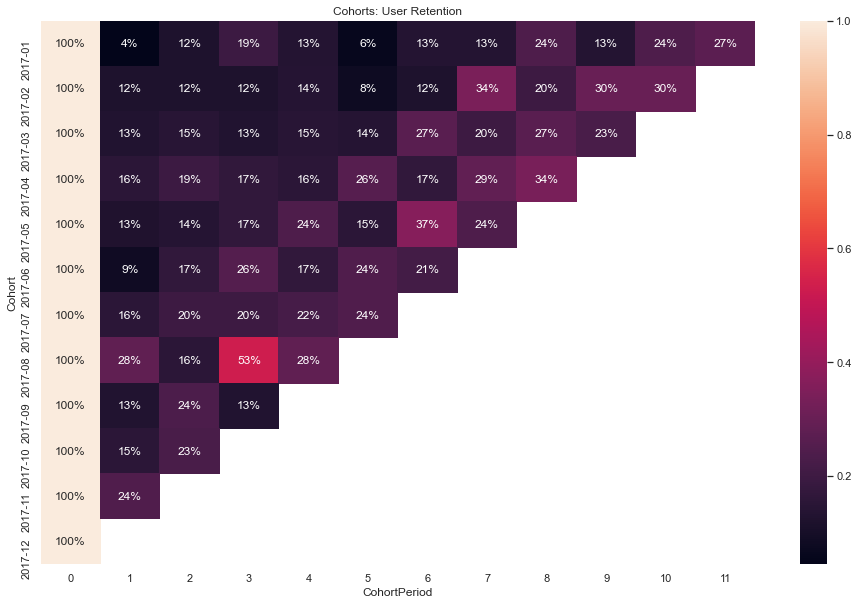

In [142]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention1.T, mask=user_retention1.T.isnull(), annot=True, fmt='.0%')

Смотрю статистику продаж в группировке по видам доставки за 2017 год

In [143]:
orders1.groupby('ship_mode').describe()['sales'].T

ship_mode,First,Same Day,Second,Standard
count,284.000000,89.000000,324.000000,990.000000
mean,493.430904,548.042022,458.955628,399.599510
std,1276.578523,1055.514957,799.776411,769.183711
min,1.392000,0.556000,1.188000,1.080000
25%,37.006000,55.176000,46.200000,32.440000
50%,166.766000,190.050000,164.420000,133.348000
75%,554.663000,608.552000,505.996000,424.835000
max,14052.480000,8167.420000,5802.700000,10499.970000


График когорт за 2016 год

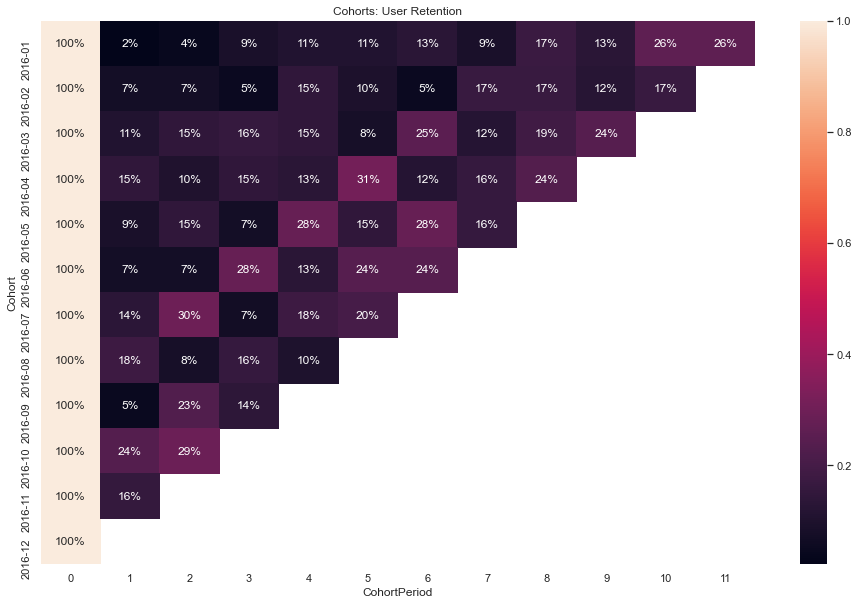

In [117]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention2.T, mask=user_retention2.T.isnull(), annot=True, fmt='.0%');

Смотрю статистику продаж в группировке по видам доставки за 2017 год

In [144]:
orders2.groupby('ship_mode').describe()['sales'].T

ship_mode,First,Same Day,Second,Standard
count,215.000000,74.000000,244.000000,782.000000
mean,382.629501,466.294068,491.813281,476.255823
std,667.988945,607.415217,933.998597,1086.973263
min,1.964000,6.480000,1.941000,0.836000
25%,31.400000,62.270000,36.098000,38.502000
50%,111.750000,174.842500,159.376000,150.546000
75%,436.405000,685.266000,524.191000,531.940000
max,4438.686000,2824.230000,8805.040000,18336.740000


Средний retention rate пользователей на последнем месяце в 2016 году за 11 месяцев (исключая последний) по всем когортам - 20%
При этом в 2016 году было 1315 заказов
Из них количество по видам доставки и средний чек:
Same Day - 74 и 466
First - 215 и 382
Second - 244 и 491
Standard - 782 и 476

Средний retention rate пользователей на последнем месяце в 2017 году за 11 месяцев (исключая последний) по всем когортам - 24.6%
При этом в 2017 году было 1687 заказов
Из них количество по видам доставки и средний чек:
Same Day - 89 и 548
First - 284 и 493
Second - 324 и 458
Standard - 990 и 399

Выводы:
Количество заказов в 2017 году увеличилось, а так же увеличился retention rate на 4.6%
То есть гипотеза руководителя неверна, отток пользователей в 2017 году происходит меньше чем в 2016.
Еще из данных видно, что в 2017 из-за проблем с доставкой средний чек "долгих" доставок (Second,standart) уменьшился, а "быстрых" доставок (Same day,First) увеличился. Но средний чек всех заказов в 2017 году - 434 - упал, по сравнению с 2016 годом - 463. Поэтому можно предположить, что проблемы с доставкой повлияли на покупательскую способность клиента в 2017 году.